In [10]:
#I import here the necessary modules to conduct my analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from sklearn.linear_model import Lasso,Ridge,ElasticNet

## Activity 6
- X-y split.
- Normalize (numerical).
- One Hot/Label Encoding (categorical).

In [4]:
#I import the data that will be used for the modelling

customer_data = pd.read_csv("Data/round_2_cleaned.csv")
print(customer_data.head())

           st  customer lifetime value response  coverage  \
0     arizona              4809.216960       no     basic   
1  washington             14947.917300       no     basic   
2      oregon             22332.439460      yes  extended   
3      oregon              9025.067525       no   premium   
4         NaN              4745.181764      NaN     basic   

              education effective to date employmentstatus gender  income  \
0               college           2/18/11         employed      m   48029   
1              bachelor           2/10/11         employed      m   22139   
2               college           1/11/11         employed      m   49078   
3              bachelor           1/17/11    medical leave      f   23675   
4  high school or below           2/14/11         employed      m   50549   

  location code  ... number of policies     policy type        policy  \
0      suburban  ...                  9  corporate auto  corporate l3   
1      suburban  ...    

In [3]:
# I decide here,to drop every row containing an NA value
customer_data.dropna(inplace=True)

#Objective : remove the outliers in the dataset for every numerical value with a z score > 3

#Z score calculation

from scipy import stats

customer_data = customer_data._get_numeric_data()

z = np.abs(stats.zscore(customer_data))

customer_data = customer_data[(z<3).all(axis=1)]

print(z)

In [7]:
customer_data.shape

(3114, 8)

In [4]:
#I decide here, to drop the categorical column "effective to date" because the excessive amount of different values could affect the prediction negatively.
#Alternatively, I could keep the months or convert it as bins
customer_data.drop("effective to date",axis=1,inplace=True)

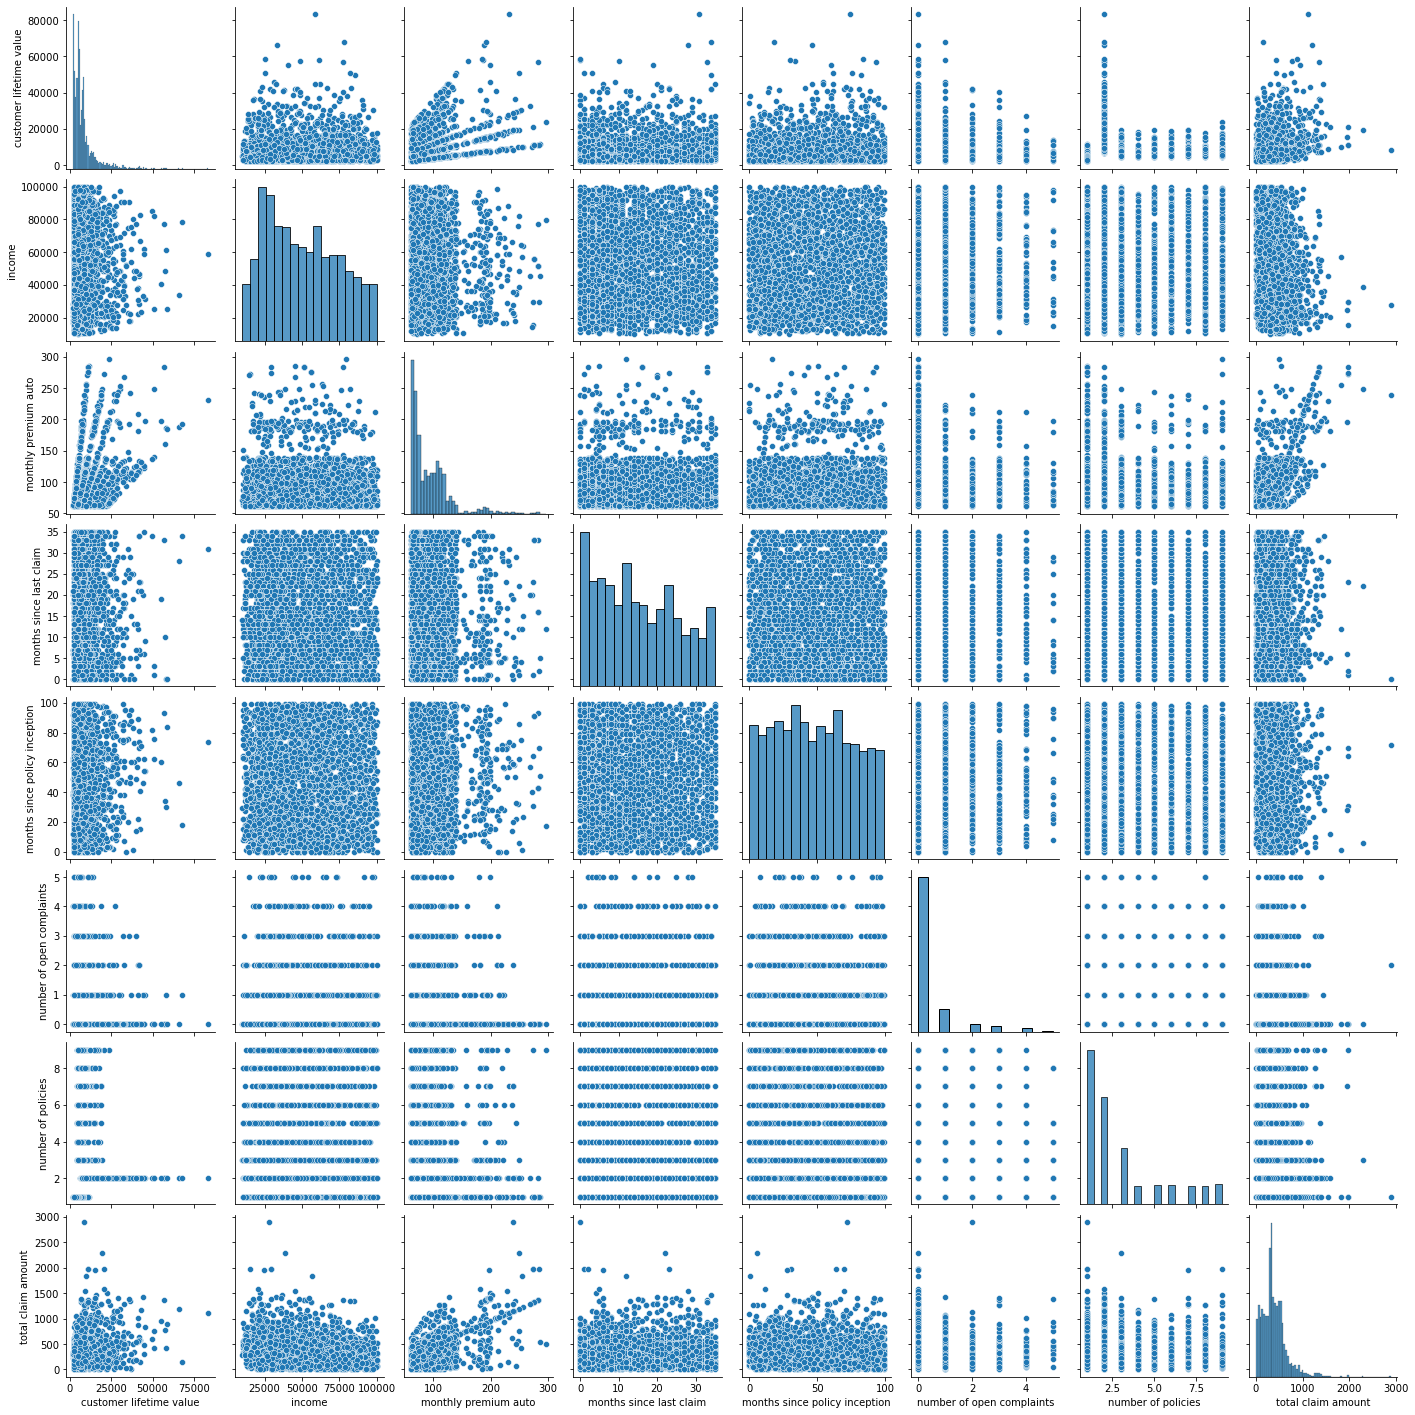

In [5]:
#Check the correlation between variables

sns.pairplot(customer_data)

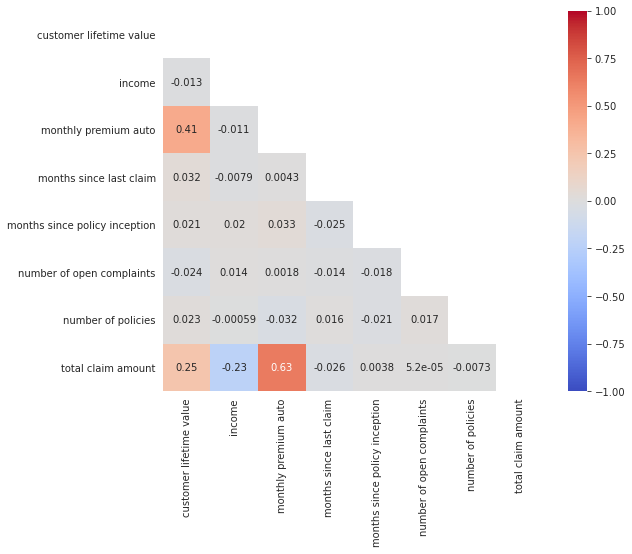

In [6]:
#Plot the correlation heatmap in order to identify and drop the highly correlated values

corr = customer_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [7]:
#Hot coding Categorical Variables : I will encode the categorical variables to use them for the modelling, and predict a model with and without them

customer_data = pd.get_dummies(customer_data, drop_first=True)
#Why do we use drop first ? To reduce the redundancy
customer_data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,st_california,st_nevada,...,vehicle class_luxury car,vehicle class_luxury suv,vehicle class_sports car,vehicle class_suv,vehicle class_two-door car,vehicle size_medsize,vehicle size_small,zone_east,zone_north west,zone_west region
1,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0,0,...,0,0,0,1,0,1,0,1,0,0
2,22332.439460,49078,97,10.0,3,0.0,2,484.013411,0,0,...,0,0,0,0,0,1,0,0,1,0
9,5154.764074,82730,127,13.0,31,0.0,1,442.521087,0,0,...,0,0,0,1,0,0,0,0,0,0
12,5454.587929,66334,69,25.0,25,0.0,4,331.200000,1,0,...,0,0,0,0,1,1,0,0,0,1
14,5326.677654,76717,66,26.0,10,0.0,6,300.528579,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,9075.768214,37722,116,8.0,23,0.0,8,158.077504,0,0,...,0,0,1,0,0,1,0,0,0,0
8006,3579.023825,28304,91,10.0,30,2.0,1,655.200000,1,0,...,0,0,0,0,0,1,0,0,0,1
8007,2771.663013,59855,74,30.0,82,4.0,1,355.200000,0,0,...,0,0,0,0,1,1,0,0,0,0
8008,5259.444853,61146,65,7.0,68,0.0,6,273.018929,0,0,...,0,0,0,0,0,1,0,0,1,0


In [8]:
# x y split , x being the features and y the label

X=customer_data.drop('total claim amount', axis=1)
y=customer_data["total claim amount"]

In [12]:
#This is used only to keep the numerical columns
X=X._get_numeric_data()

X

X.isna().sum()

customer lifetime value          0
income                           0
monthly premium auto             0
months since policy inception    0
number of policies               0
dtype: int64

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [10]:
#Transformation with the standard scaler

std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [11]:
X_test_scaled=std_scaler.transform(X_test)

In [12]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.11007168 -1.0909293   0.56834826 ... -0.32112621 -0.63293017
   1.42843173]
 [-0.77619407 -1.30998024 -0.64560982 ... -0.32112621 -0.63293017
   1.42843173]
 [-0.7324167   0.88044573 -0.64560982 ... -0.32112621 -0.63293017
  -0.70006846]
 ...
 [-0.74767229 -1.3901432  -0.64560982 ... -0.32112621 -0.63293017
  -0.70006846]
 [-0.03916609  0.71611581 -0.78676773 ... -0.32112621 -0.63293017
   1.42843173]
 [-0.09862986 -0.10887039  0.00371659 ... -0.32112621  1.57995312
  -0.70006846]]
--------
[[ 1.88737130e-03  5.22089736e-01 -7.30304568e-01 ... -3.21126211e-01
   1.57995312e+00 -7.00068459e-01]
 [-4.52043554e-01  7.27835790e-01 -9.27925649e-01 ... -3.21126211e-01
   1.57995312e+00 -7.00068459e-01]
 [ 2.00248892e+00 -1.12487969e+00 -8.14999317e-01 ... -3.21126211e-01
   1.57995312e+00 -7.00068459e-01]
 ...
 [-3.67348867e-03 -4.63931440e-01  2.57800842e-01 ... -3.21126211e-01
  -6.32930170e-01 -7.00068459e-01]
 [-4.09450154e-01  1.96506485e+00 -8.43230900e-01 ... -3.21126211e-01
   1

### Activity 7 
#### Linear Regression
- Train-test split.
- Standardize the data (after the data split).
- Apply linear regression.
- Model Interpretation.
#### Model Validation
- Model Evaluation:
  - MSE.
  - RMSE.
  - MAE.
  - R2.
  - Adjusted R2.
- Feature Importance.

In [13]:
#Which model do we use ? Statsmodels,scikit-learn,seaborn ?
#Linear regression with scikit-learn

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [14]:
model.coef_

array([ 2.11468687e+00, -7.95412169e+00,  1.64157957e+02, -8.70091777e-01,
       -3.01259311e+00, -1.33358811e+00,  3.32608538e+00, -7.31305067e+13,
        1.58468102e+00, -4.07157189e+14,  8.07672629e+14, -2.55468750e+00,
       -2.20019531e+00, -5.45654297e+00, -1.07373047e+00, -3.01757812e+00,
        3.28320312e+00, -4.00756836e+00, -1.72656250e+00,  2.28906250e+00,
       -3.81933594e+00,  1.63183594e+00,  1.88029297e+02,  9.39785156e+01,
       -9.31445312e+00,  1.14843750e+00, -3.65841894e+15, -1.56022118e+14,
       -1.09570312e+00,  5.19335938e+00,  2.83336168e+15,  3.39709841e+15,
        4.03623090e+15,  6.77925418e+13,  9.87214753e+13,  1.03947756e+14,
        3.66796875e+00,  4.29882812e+00,  4.72741699e+00, -9.99755859e-02,
        1.69653320e+00, -2.39990234e+00, -1.48876953e+00, -8.08984375e+00,
       -1.41513672e+01, -1.36513672e+01, -1.43750000e+00,  1.41259766e+00,
        3.73486328e+00, -8.07672629e+14,  4.07157189e+14,  7.31305067e+13])

In [15]:
model.intercept_

381.32657613641385

In [16]:
y_pred=model.predict(X_test_scaled)

In [17]:
y_test

1160    326.400000
5872    365.879938
4351      1.687291
3170    345.211703
1118    316.800000
           ...    
5582     56.603330
7682    921.600000
6772     41.965252
6796    307.200000
951     430.291740
Name: total claim amount, Length: 1000, dtype: float64

In [18]:
y_pred

array([ 4.03162514e+02,  3.83287514e+02,  2.42875136e+01,  5.06060951e+02,
        3.71537514e+02,  1.22217201e+02,  4.01412514e+02,  4.31662514e+02,
       -1.08748636e+00,  5.18998451e+02,  1.14653751e+03,  6.76662514e+02,
       -1.74624864e+01,  4.43975014e+02,  2.23850014e+02,  2.20560951e+02,
        1.80685951e+02,  3.94037514e+02,  4.34037514e+02,  2.70162514e+02,
        4.74310951e+02,  5.25412514e+02,  3.43500136e+01,  5.56435951e+02,
        5.42975014e+02,  3.54810951e+02,  4.15248451e+02,  2.23310951e+02,
        1.66873451e+02,  3.87350014e+02,  4.43248451e+02,  4.92912514e+02,
        3.57248451e+02,  4.90123451e+02,  5.47935951e+02, -1.68374864e+01,
        5.53751364e+00,  2.56935951e+02,  2.76912514e+02,  4.82810951e+02,
        3.90537514e+02,  3.54912514e+02,  2.91850014e+02,  2.33092201e+02,
       -4.17124864e+01,  4.32935951e+02, -3.15874864e+01,  9.62875136e+01,
        5.89162514e+02,  5.17537514e+02,  4.10225014e+02,  1.50975014e+02,
       -6.96248636e+00,  

In [19]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

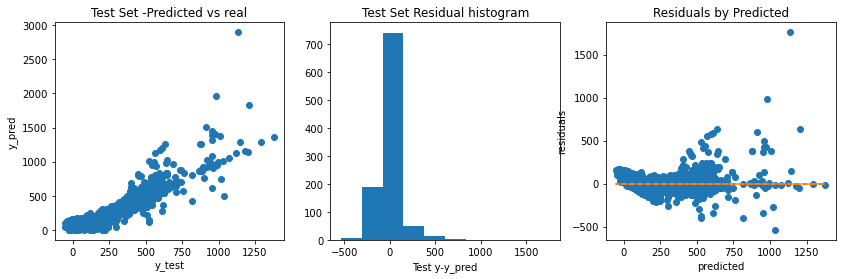

In [20]:
# Make an scatter plot y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [21]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

16937.88485213992
83.24471227191643


In [22]:
R2=r2_score(y_test,y_pred)
R2

0.7651477948247782

In [24]:
#Adjusted R2

Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7522520031995285

In [23]:
#Feature importance

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

features_importances

,Attribute,Importance
32,policy_personal l3,4.036231e+15
26,policy type_personal auto,3.658419e+15
31,policy_personal l2,3.397098e+15
30,policy_personal l1,2.833362e+15
10,st_washington,8.076726e+14
...,...,...
25,marital status_single,1.148438e+00
28,policy_corporate l2,1.095703e+00
14,education_college,1.073730e+00
3,months since last claim,8.700918e-01


In [6]:
def modelling(df,target,scaler,model):
    df.dropna(inplace=True)

    X = df.drop(target,axis = 1)
    y = df[target]

    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size= 0.3, random_state=0)

    X_train_num = X_train._get_numeric_data()
    X_test_num = X_test._get_numeric_data()

    scaler.fit(X_train_num)
    X_train_scaled = scaler.transform(X_train_num)
    X_test_scaled = scaler.transform(X_test_num)
    
    model.fit(X_train_scaled, y_train)

    y_pred_train = model.predict(X_train_scaled)
    y_pred = model.predict(X_test_scaled)

    R2_train = r2_score(y_train, y_pred_train)
    print("R2_train =",R2_train)
    
    R2_test = r2_score(y_test,y_pred)
    print("R2_test =",R2_test)
    
    RMSE_train = mse(y_train, y_pred_train, squared=False)
    print("RMSE_train =",RMSE_train)
    
    RMSE_test = mse(y_test,y_pred, squared=False)
    print("RMSE_test =",RMSE_test)
    
    MSE_train = mse(y_train,y_pred_train)
    print("MSE_train =",MSE_train)
    
    MSE_test = mse(y_test,y_pred)
    print("MSE_test =",MSE_test)
    
    MAE_train = mae(y_train,y_pred_train)
    print("MAE_train =",MAE_train)
    
    MAE_test = mae(y_test,y_pred)
    print("MAE_test =",MAE_test)

In [7]:
modelling(customer_data,"total claim amount",StandardScaler(),LinearRegression())

R2_train = 0.4505610799499542
R2_test = 0.4537202153565507
RMSE_train = 194.4936898798183
RMSE_test = 181.32434613168996
MSE_train = 37827.79540306694
MSE_test = 32878.51850008491
MAE_train = 137.73812614709803
MAE_test = 132.876301827797


In [8]:
modelling(customer_data,"total claim amount",StandardScaler(),Lasso(alpha=0.05))

R2_train = 0.4505607587506325
R2_test = 0.45377741865179566
RMSE_train = 194.4937467298428
RMSE_test = 181.31485225881934
MSE_train = 37827.81751701224
MSE_test = 32875.07564963749
MAE_train = 137.73531927954178
MAE_test = 132.87288147354707


In [9]:
modelling(customer_data,"total claim amount",StandardScaler(),Ridge(alpha=10000))

R2_train = 0.16571744400097188
R2_test = 0.1785987843864113
RMSE_train = 239.6637703587169
RMSE_test = 222.34441545216907
MSE_train = 57438.72282255579
MSE_test = 49437.03908276676
MAE_train = 171.76745011449293
MAE_test = 163.3117157835912


In [27]:
modelling(customer_data,"total claim amount",StandardScaler(),ElasticNet(alpha=0.1))

R2_train = 0.4493297826450654
R2_test = 0.45597246758463106
RMSE_train = 194.7114989288568
RMSE_test = 180.9501697672511
MSE_train = 37912.5678151222
MSE_test = 32742.963938797
MAE_train = 138.36951194594258
MAE_test = 133.1602633468143


In [20]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features

X = customer_data.drop("total claim amount",axis = 1)._get_numeric_data()
y = customer_data["total claim amount"]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size= 0.3, random_state=0)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold(threshold=100) # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

Initial number of numerical columns:  (2332, 7)

Final number of numerical columns:  (2332, 5)



,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception
0,8161.781091,45270.0,70.0,11.0,63.0
1,7777.201669,46182.0,65.0,23.0,27.0
2,9927.877699,58703.0,127.0,32.0,26.0
3,20101.651410,23638.0,102.0,32.0,62.0
4,5054.334903,22241.0,63.0,1.0,1.0
...,...,...,...,...,...
2327,9414.119587,20455.0,84.0,14.0,40.0
2328,4835.783179,36655.0,61.0,15.0,81.0
2329,2674.227315,33451.0,67.0,0.0,1.0
2330,20998.259470,71663.0,74.0,23.0,22.0


In [21]:
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X = customer_data.drop("total claim amount",axis = 1)._get_numeric_data()
y = customer_data["total claim amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 3, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Final selected features: 


,monthly premium auto,number of open complaints,number of policies
0,63.0,0.0,1.0
1,71.0,0.0,1.0
2,112.0,0.0,9.0
3,182.0,0.0,6.0
4,82.0,0.0,2.0
...,...,...,...
2660,86.0,0.0,3.0
2661,79.0,0.0,1.0
2662,105.0,0.0,2.0
2663,116.0,0.0,3.0


In [22]:
customer_data.dropna()
X = customer_data.drop("total claim amount", axis =1)._get_numeric_data()
y = customer_data["total claim amount"]

X_added_constant = sm.add_constant(X)
X_added_constant

,const,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
1,1.0,14947.917300,22139,100,34.0,31,0.0,2
2,1.0,22332.439460,49078,97,10.0,3,0.0,2
9,1.0,5154.764074,82730,127,13.0,31,0.0,1
12,1.0,5454.587929,66334,69,25.0,25,0.0,4
14,1.0,5326.677654,76717,66,26.0,10,0.0,6
...,...,...,...,...,...,...,...,...
8003,1.0,9075.768214,37722,116,8.0,23,0.0,8
8006,1.0,3579.023825,28304,91,10.0,30,2.0,1
8007,1.0,2771.663013,59855,74,30.0,82,4.0,1
8008,1.0,5259.444853,61146,65,7.0,68,0.0,6


In [23]:
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total claim amount   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     391.7
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:16:45   Log-Likelihood:                -22220.
No. Observations:                3332   AIC:                         4.446e+04
Df Residuals:                    3324   BIC:                         4.451e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            79.8517     14.526      5.497      0.000      51.371     108.332
customer lifetime value          -0.0006      0.001     -1.208      0.227      -0.002       0.000
income                           -0.0023      0.000    -17.056      0.000      -0.003      -0.002
monthly premium auto              4.6492      0.103     45.342      0.000       4.448       4.850
months since last claim          -0.7683      0.326     -2.355      0.019      -1.408      -0.129
months since policy inception    -0.1180      0.118     -0.999      0.318      -0.349       0.114
number of open complaints         0.1782      3.695      0.048      0.962      -7.066       7.422
number of policies                1.4591      1.383      1.055      0.291      -1.252       4.170
==============================================================================
Omnibus:                      367.411   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3047.593
Skew:                           0.159   Prob(JB):                         0.00
Kurtosis:                       7.674   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_added_constant = X_added_constant.drop(['number of open complaints'], axis=1)
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total claim amount   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     457.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:18:40   Log-Likelihood:                -22220.
No. Observations:                3332   AIC:                         4.445e+04
Df Residuals:                    3325   BIC:                         4.450e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            79.9186     14.458      5.528      0.000      51.572     108.265
customer lifetime value          -0.0006      0.001     -1.210      0.227      -0.002       0.000
income                           -0.0023      0.000    -17.060      0.000      -0.003      -0.002
monthly premium auto              4.6493      0.103     45.354      0.000       4.448       4.850
months since last claim          -0.7686      0.326     -2.356      0.019      -1.408      -0.129
months since policy inception    -0.1181      0.118     -1.000      0.317      -0.350       0.113
number of policies                1.4604      1.382      1.057      0.291      -1.250       4.170
==============================================================================
Omnibus:                      367.509   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3049.461
Skew:                           0.159   Prob(JB):                         0.00
Kurtosis:                       7.676   Cond. No.                     2.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

X = customer_data._get_numeric_data()

c = abs(X.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['total claim amount'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

X[cols_to_keep]

['monthly premium auto', 'total claim amount']


,monthly premium auto,total claim amount
1,100,480.000000
2,97,484.013411
9,127,442.521087
12,69,331.200000
14,66,300.528579
...,...,...
8003,116,158.077504
8006,91,655.200000
8007,74,355.200000
8008,65,273.018929


In [ ]:
customer_data.to_csv("Data/round_2_transformed.csv")

Notes

## Using OLS to drop features with pval < 0.05
X = data.drop('total_claim_amount', axis=1)
y = np.log(data.total_claim_amount)

X = X.select_dtypes(include=np.number)
X_added_constant = sm.add_constant(X)
ols_model = sm.OLS(y,X_added_constant).fit()

## drop features with pval < 0.05
pv = ols_model.pvalues
X_pfiltered = X_added_constant[pv[pv < 0.05].index].drop('const', axis=1).reset_index(drop=True)
X_pfiltered.shape

## Using RFE to select best subset of features
selector = RFE(LinearRegression(), step=1)
selector = selector.fit(X, y)

X_rfe = X[X.columns[selector.support_]]
X_rfe.shape
